> **`(!)`** 2021 Written by Giovanni Squillero <[squillero@polito.it](squillero@polito.it)> — **Not intended for sharing**  
> Dissemination or reproduction is forbidden and may result in civil charges and criminal penalties

In [1]:
import os
import pandas as pd
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

In [2]:
import logging
logging.basicConfig(format='[%(asctime)s] %(levelname)s: %(message)s', datefmt='%H:%M:%S')
logging.getLogger().setLevel(level=logging.INFO)

In [3]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]

In [4]:
FILENAME = 'tset_H10_slip_noslip.csv'
#FILENAME = '2021_05_21_tset_new_ref_H10_2.csv'
file_name = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'Dati AROL', 'Esempi per analisi dei dati', 'Spettrometria', FILENAME))

In [46]:
data_all = pd.read_csv(file_name)
data = data_all[data_all.Name=='HDPE'].copy()
data.reset_index(inplace=True)
del data['index']
X = data.iloc[:,:-2].values.astype(float)

palette_arol = {n: c for n, c in zip(pd.unique(data['Name']), pd.unique(data['Color']))}

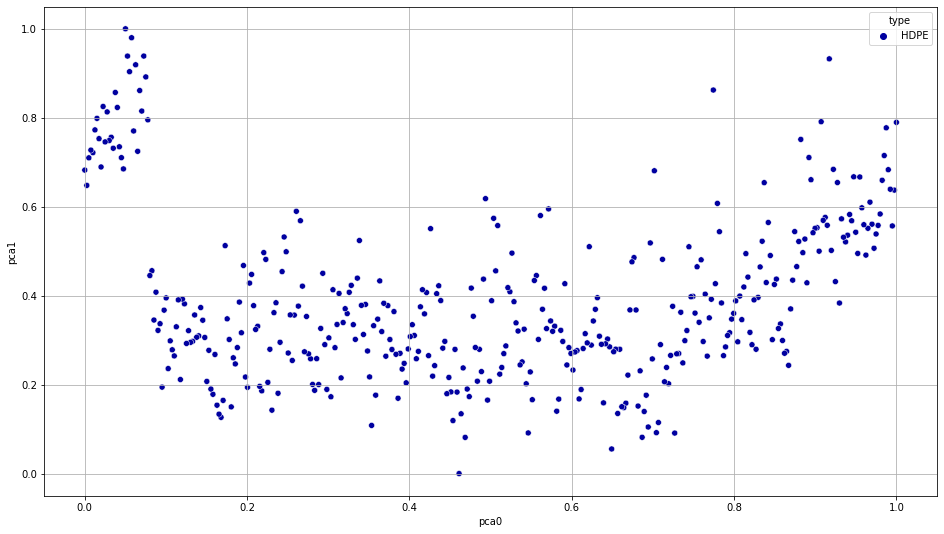

In [47]:
#data_preprocessor = TSNE(n_components=2)
data_preprocessor = make_pipeline(PCA(n_components=2), MinMaxScaler())
X_pca = data_preprocessor.fit_transform(X)

df = pd.DataFrame(X_pca, columns=[f'pca{n}' for n in range(X_pca.shape[1])])
df['type'] = data['Name']

ax = sns.scatterplot(data=df, x='pca0', y='pca1', hue='type', palette=palette_arol)
ax.grid(True)

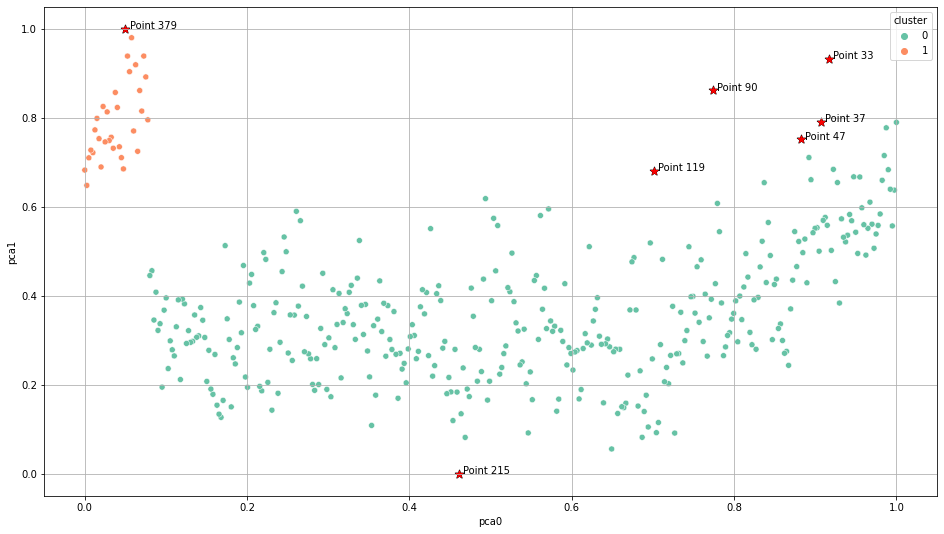

In [48]:
cluster_tool = make_pipeline(MinMaxScaler(), DBSCAN(eps=0.7))
df['cluster'] = cluster_tool.fit_predict(X)
df['label'] = ''

df.loc[df.cluster==-1, 'label'] = [f'Point {n}' for n in df[df.cluster==-1].index]

ax = sns.scatterplot(data=df[df.cluster>=0], x='pca0', y='pca1', hue='cluster', palette='Set2')

ax.scatter(x=df.loc[df.cluster==-1, 'pca0'], y=df.loc[df.cluster==-1, 'pca1'], marker='*', s=80, color='black')
ax.scatter(x=df.loc[df.cluster==-1, 'pca0'], y=df.loc[df.cluster==-1, 'pca1'], marker='*', s=50, color='red')
outliers = df[df.cluster < 0]
for label, x, y in zip(outliers.label, outliers.pca0, outliers.pca1):
    ax.annotate(label, (x+.005, y))

ax.grid(True)

In [50]:
data[df.cluster==1]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,152,153,154,155,156,157,158,159,Name,Color
368,768,0.164812,0.173619,0.178385,0.183198,0.187652,0.188769,0.187520,0.179407,0.172232,...,0.405479,0.409930,0.420947,0.432485,0.449227,0.457323,0.502637,0.506272,HDPE,#0000a0
369,769,0.171813,0.179792,0.186219,0.190937,0.195949,0.197065,0.195286,0.186513,0.180069,...,0.415313,0.422553,0.432041,0.439031,0.461030,0.466460,0.494682,0.519821,HDPE,#0000a0
370,770,0.176095,0.182830,0.189590,0.194136,0.198561,0.200826,0.198370,0.190029,0.183265,...,0.421459,0.427504,0.438060,0.443600,0.462944,0.473505,0.502275,0.522257,HDPE,#0000a0
371,771,0.167306,0.174306,0.180623,0.185560,0.190697,0.192263,0.190569,0.181500,0.174221,...,0.406900,0.412202,0.422462,0.429295,0.452172,0.460863,0.490552,0.505773,HDPE,#0000a0
372,772,0.174176,0.181131,0.188695,0.192608,0.197194,0.198869,0.197242,0.188623,0.181682,...,0.411051,0.415541,0.424632,0.430795,0.450959,0.457946,0.480627,0.508274,HDPE,#0000a0
373,773,0.165726,0.173061,0.179176,0.184815,0.189409,0.190574,0.188457,0.179656,0.172562,...,0.393638,0.398340,0.406477,0.413444,0.432808,0.444251,0.473456,0.493964,HDPE,#0000a0
374,774,0.180271,0.186162,0.193615,0.197947,0.203143,0.205962,0.203037,0.194671,0.187255,...,0.415039,0.419857,0.428068,0.434509,0.454081,0.463547,0.492789,0.512595,HDPE,#0000a0
375,775,0.170338,0.176912,0.183775,0.188315,0.194354,0.195721,0.193303,0.184566,0.177908,...,0.398819,0.402379,0.410418,0.416787,0.434161,0.444331,0.470362,0.495841,HDPE,#0000a0
376,776,0.178780,0.185728,0.192693,0.196819,0.203406,0.204523,0.203115,0.194089,0.187243,...,0.423273,0.425324,0.432325,0.439290,0.457691,0.467010,0.500890,0.522923,HDPE,#0000a0
377,777,0.173734,0.180949,0.187727,0.192558,0.198435,0.200880,0.199108,0.189602,0.182423,...,0.411947,0.417276,0.424279,0.426449,0.449912,0.456329,0.488561,0.509997,HDPE,#0000a0
